<a href="https://colab.research.google.com/github/putuwinda/Assignment6_DTI/blob/main/TugasClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Name : Ni Putu Winda Ardiyanti
- ID : DS0123

We are trying to compare the model that we will use in this classification.


--- **Dataset** ---

This dataset contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription. 
--- **Features** ---

1. age: define the age
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education: (categorical: primary, secondary, tertiary and unknown)
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. balance: Balance of the individual.
9. contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan' until 'dec')
11. day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. duration: last contact duration, in seconds (numeric). 
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

---**Target Features**---
17. Deposit (yes(1)/no(0))

In [23]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

#import the classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#import train_test_split to split the data
from sklearn.model_selection import train_test_split

# Import module to standardize the scale(normalization)
import pandas as pd
import numpy as np

# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id = '1_fU2dem-wKdaf7YKI4XEogjMfFVT8IaX'
print (id) # Verify that you have everything after '='

1_fU2dem-wKdaf7YKI4XEogjMfFVT8IaX


In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bank.csv')  
df = pd.read_csv('bank.csv')

# Dataset

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Missing Value

there are no exist a missing value in this dataset

In [8]:
pip install missingno

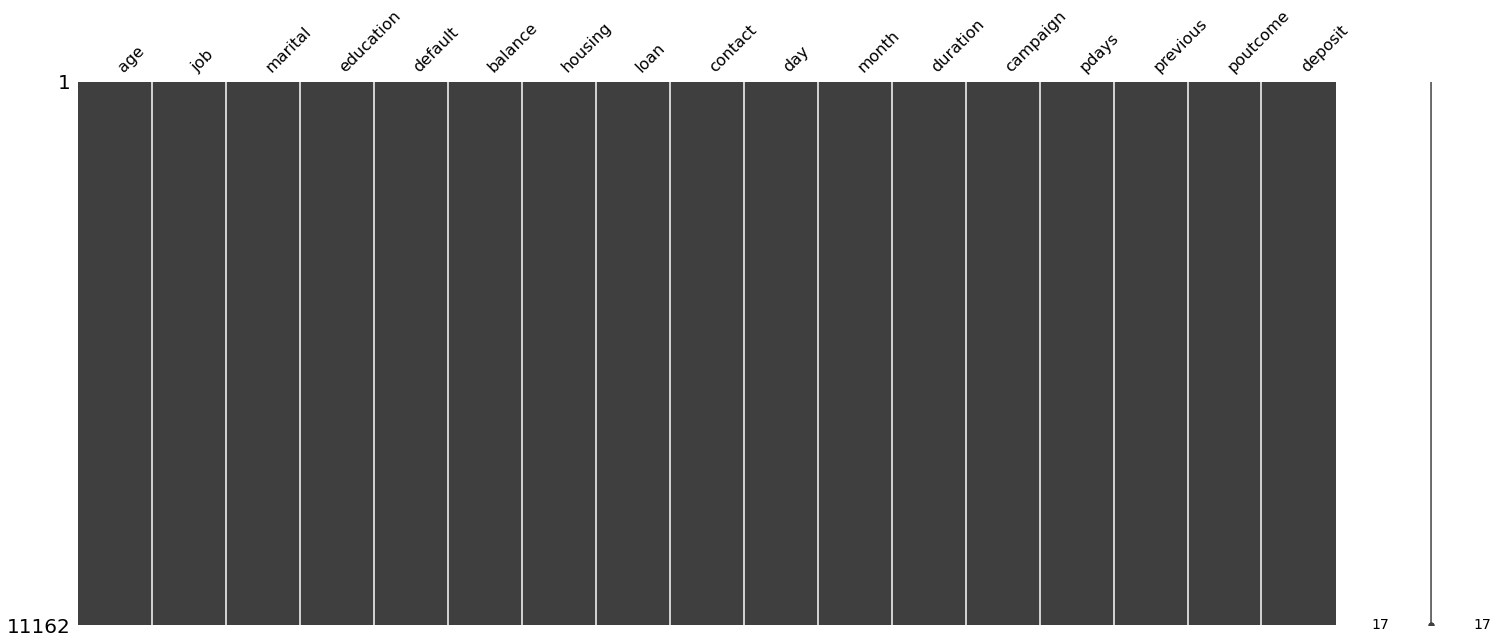

In [9]:
import missingno as msno
msno.matrix(df)

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# **Data Preprocessing**


IN THIS PHASE OF DATA PREPROCESSING, WE DO SEVERAL STEPS WHICH IS

- FEATURES ENCODING
- MINMAX NORMALIZATION
- PICK THE TARGET DATA FOR CLASSIFICATION
- VISUALIZE AND MATRIX CORRELATION

## 1. Encode the Data using LabelEncoder()


in this phase we encode the categorical data into numerical, we do this because we need the numerical form of data for the classification!

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [12]:
#import the library for encode the data, this model is using LabelEncoder to encode the data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#begin to encode it
job               = le.fit_transform(df['job'])
marital           = le.fit_transform(df['marital'])
education         = le.fit_transform(df['education'])
default           = le.fit_transform(df['default'])
housing           = le.fit_transform(df['housing'])
loan              = le.fit_transform(df['loan'])
contact           = le.fit_transform(df['contact'])
month             = le.fit_transform(df['month'])
poutcome          = le.fit_transform(df['poutcome'])
deposit           = le.fit_transform(df['deposit'])

df['job']       = job
df['marital']   = marital
df['education'] = education
df['default']   = default
df['housing']   = housing
df['loan']      = loan
df['contact']   = contact
df['month']     = month
df['poutcome']  = poutcome
df['deposit']    = deposit


Voila! the data has been encoded!

In [13]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


## 2. After that, we pick the target data and the train data for the classification

In [14]:
#prepare the features that use for clasification (training data)
features = [
    'age',
    'job',
    'marital',
    'education',
    'default',
    'balance',
    'housing',
    'loan',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
]

In [15]:
features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

Target feature

In [16]:
df['deposit'].unique()

array([1, 0])

## 3. MinMax Normalization

we do the MinMax normalization for the fatures that we are going to use as the training dataset

the range of data become 0-1

In [17]:
from sklearn.preprocessing import MinMaxScaler
feat_scale = MinMaxScaler().fit_transform(df[features])
scaleddata = pd.DataFrame(data = feat_scale , columns=['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome'])
scaleddata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0,1.0,0.133333,0.727273,0.268110,0.000000,0.000000,0.000000,1.0
1,0.493506,0.000000,0.5,0.333333,0.0,0.078273,0.0,0.0,1.0,0.133333,0.727273,0.377675,0.000000,0.000000,0.000000,1.0
2,0.298701,0.818182,0.5,0.333333,0.0,0.092185,1.0,0.0,1.0,0.133333,0.727273,0.357566,0.000000,0.000000,0.000000,1.0
3,0.480519,0.636364,0.5,0.333333,0.0,0.105882,1.0,0.0,1.0,0.133333,0.727273,0.148750,0.000000,0.000000,0.000000,1.0
4,0.467532,0.000000,0.5,0.666667,0.0,0.079851,0.0,0.0,1.0,0.133333,0.727273,0.172983,0.016129,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.090909,1.0,0.000000,0.0,0.077773,1.0,0.0,0.0,0.633333,0.000000,0.065739,0.000000,0.000000,0.000000,1.0
11158,0.272727,0.636364,0.5,0.333333,0.0,0.086086,0.0,0.0,1.0,0.500000,0.545455,0.020882,0.048387,0.000000,0.000000,1.0
11159,0.181818,0.818182,1.0,0.333333,0.0,0.078091,0.0,0.0,0.0,0.600000,0.090909,0.039701,0.016129,0.000000,0.000000,1.0
11160,0.324675,0.818182,0.5,0.333333,0.0,0.077762,0.0,1.0,0.0,0.233333,0.727273,0.001805,0.016129,0.202339,0.086207,0.0


## Visualize the data

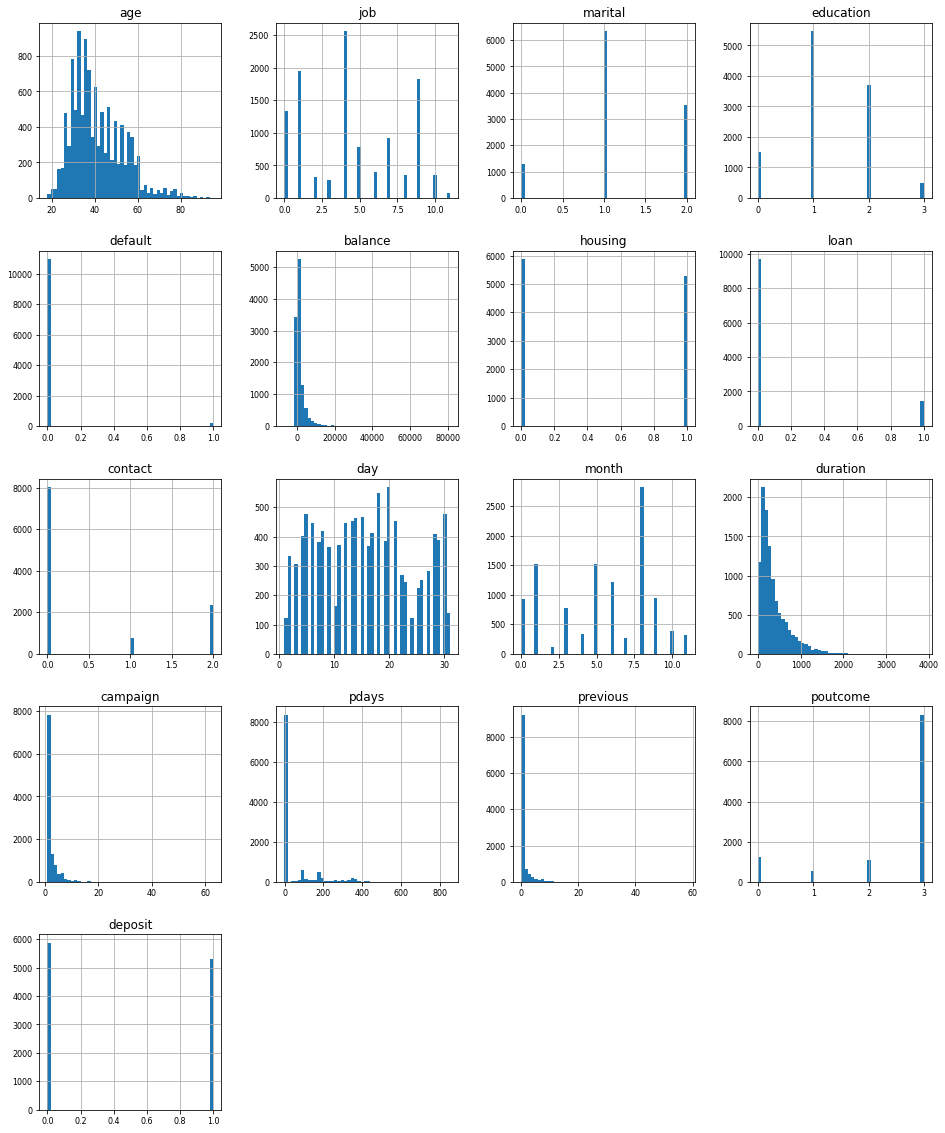

In [18]:
## If we use plot function from pandas modul, you can simply write:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


## Matrix Correlation between Target Features and Training Features

In [19]:
df_corr = df.corr()['deposit'][:-1] # -1 because the latest row is deposit
print("all other features correlation to the Deposit:\n", df_corr.sort_values(ascending=False))

golden_features_list = df_corr[abs(df_corr) > 0.1].sort_values(ascending=False) ##write your code here
print("There is {} strongly correlated values with deposit:\n{}".format(len(golden_features_list), golden_features_list))

all other features correlation to the Deposit:
 duration     0.451919
pdays        0.151593
previous     0.139867
education    0.095948
balance      0.081129
marital      0.067610
job          0.063395
age          0.034901
month       -0.037121
default     -0.040680
day         -0.056326
loan        -0.110580
poutcome    -0.122369
campaign    -0.128081
housing     -0.203888
contact     -0.249847
Name: deposit, dtype: float64
There is 8 strongly correlated values with deposit:
duration    0.451919
pdays       0.151593
previous    0.139867
loan       -0.110580
poutcome   -0.122369
campaign   -0.128081
housing    -0.203888
contact    -0.249847
Name: deposit, dtype: float64


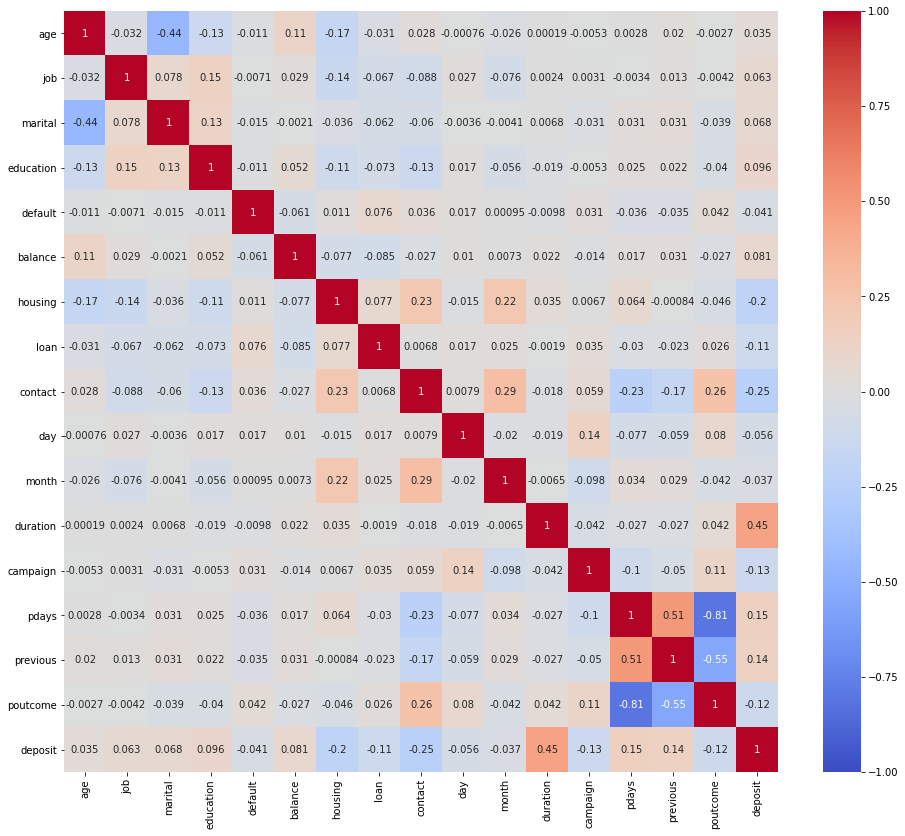

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

# Data Splitting

Split the dataset into the **Train Data** and **Test Data**

in this phase, we split the data into training and test data for classification

In [25]:
# Set the X and y
X = feat_scale # training dataset
y = df.deposit #testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
testingdata = pd.DataFrame(data = y)
testingdata

,deposit
0,1
1,1
2,1
3,1
4,1
...,...
11157,0
11158,0
11159,0
11160,0


In [27]:
trainingdata = pd.DataFrame(data = X , columns=['age',
    'job',
    'marital',
    'education',
    'default',
    'balance',
    'housing',
    'loan',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
])
trainingdata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0,1.0,0.133333,0.727273,0.268110,0.000000,0.000000,0.000000,1.0
1,0.493506,0.000000,0.5,0.333333,0.0,0.078273,0.0,0.0,1.0,0.133333,0.727273,0.377675,0.000000,0.000000,0.000000,1.0
2,0.298701,0.818182,0.5,0.333333,0.0,0.092185,1.0,0.0,1.0,0.133333,0.727273,0.357566,0.000000,0.000000,0.000000,1.0
3,0.480519,0.636364,0.5,0.333333,0.0,0.105882,1.0,0.0,1.0,0.133333,0.727273,0.148750,0.000000,0.000000,0.000000,1.0
4,0.467532,0.000000,0.5,0.666667,0.0,0.079851,0.0,0.0,1.0,0.133333,0.727273,0.172983,0.016129,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.090909,1.0,0.000000,0.0,0.077773,1.0,0.0,0.0,0.633333,0.000000,0.065739,0.000000,0.000000,0.000000,1.0
11158,0.272727,0.636364,0.5,0.333333,0.0,0.086086,0.0,0.0,1.0,0.500000,0.545455,0.020882,0.048387,0.000000,0.000000,1.0
11159,0.181818,0.818182,1.0,0.333333,0.0,0.078091,0.0,0.0,0.0,0.600000,0.090909,0.039701,0.016129,0.000000,0.000000,1.0
11160,0.324675,0.818182,0.5,0.333333,0.0,0.077762,0.0,1.0,0.0,0.233333,0.727273,0.001805,0.016129,0.202339,0.086207,0.0


# Classification

Now all the step on data preprocessing is finish, the next phase is we do our classification

in this phase we do the classification using 3 classifier.

1. Naive Bayes (Gaussian)
2. Decision tree
3. KNN

## --- classifier ---

 **1. Naive Bayes**

In [28]:
#using Gaussian Naive Bayes to predict the class
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_NB = gnb.predict(X_test)
#return the prediction
y_pred_NB

array([1, 0, 1, ..., 1, 1, 0])

**2. Decision Tree**

In [29]:
#using the decision tree to predict the class
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(X_train,y_train)
y_pred_ID3 = model_dt.predict(X_test)
#return the prediction
y_pred_ID3

array([1, 0, 1, ..., 0, 0, 0])

**3. KNN**

In [30]:
#using the knn to predict the class
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
#return the prediction
y_pred_knn

array([1, 0, 1, ..., 0, 0, 0])

## --- confusion matrix betweens classifier ---

in this phase we calculate the Accuraccy, Confussion Matrix, Precision, Recall,F1-Score, Support of every model.

**1. Naive Bayes**

In [31]:
# print the Confusion Matrix, Acuracy Score, and Report (precision, recallm f1-score, support)
y_true = y_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix Naive Bayes Classifier :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix Naive Bayes Classifier :
[[1248  513]
 [ 316 1272]]
Accuracy Score : 0.7524634219169901
Report : 
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1761
           1       0.71      0.80      0.75      1588

    accuracy                           0.75      3349
   macro avg       0.76      0.75      0.75      3349
weighted avg       0.76      0.75      0.75      3349



**2. Decision Tree**

In [32]:
# print the Confusion Matrix, Acuracy Score, and Report (precision, recallm f1-score, support)
y_true = y_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[1387  374]
 [ 357 1231]]
Accuracy Score : 0.7817258883248731
Report : 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1761
           1       0.77      0.78      0.77      1588

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



**3. KNN**

In [33]:
#print the Confusion Matrix, Acuracy Score, and Report (precision, recallm f1-score, support)
y_true = y_test
results = confusion_matrix(y_true, y_pred_knn) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_knn))
print('Report : ')
print(classification_report(y_true, y_pred_knn))

Confusion Matrix :
[[1431  330]
 [ 564 1024]]
Accuracy Score : 0.7330546431770678
Report : 
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1761
           1       0.76      0.64      0.70      1588

    accuracy                           0.73      3349
   macro avg       0.74      0.73      0.73      3349
weighted avg       0.74      0.73      0.73      3349



# Comparison Between Accuracy

In this phase we compare the acuracy between model knn, decision tree and naive bayes.

from rhe confusion matrix above, we know that the highest accuracy is reach when using the  decision tree model.

- decision tree : 0.7817258883248731
- naive bayes : 0.7524634219169901
- KNN : 0.7330546431770678


In [34]:
result_class = pd.DataFrame({
    'True Predictions': y_true,
    'Naive Bayes': y_pred_NB,
    'KNN' : y_pred_knn,
    'Decision Tree' : y_pred_ID3
})

result_class

,True Predictions,Naive Bayes,KNN,Decision Tree
8096,0,1,1,1
8180,0,0,0,0
1387,1,1,1,1
3047,1,1,1,0
4670,1,1,1,0
...,...,...,...,...
9252,0,0,0,0
3197,1,1,1,1
4335,1,1,0,0
5417,0,1,0,0


**Print the result class**

note : the value of the class label (deposit column) is has 2 values (0 and 1)

the result class that has almost a same result as the true prediction are Decision Tree (we can get this conclusion by calculate the value gap between result class by the classifier with the true prediction)

In [35]:
result_class['Naive Bayes'].value_counts()

1    1785
0    1564
Name: Naive Bayes, dtype: int64

In [36]:
result_class['KNN'].value_counts()

0    1995
1    1354
Name: KNN, dtype: int64

In [37]:
result_class['Decision Tree'].value_counts()

0    1744
1    1605
Name: Decision Tree, dtype: int64

In [38]:
result_class['True Predictions'].value_counts()

0    1761
1    1588
Name: True Predictions, dtype: int64

# ROC CURVE

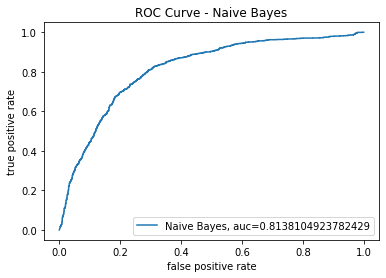

In [40]:
#ROC Curve
y_pred_NB = gnb.predict_proba(X_test)[::,1]
fprnb, tprnb, _ = metrics.roc_curve(y_test,  y_pred_NB)
aucnb = metrics.roc_auc_score(y_test, y_pred_NB)
plt.plot(fprnb,tprnb,label="Naive Bayes, auc="+str(aucnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

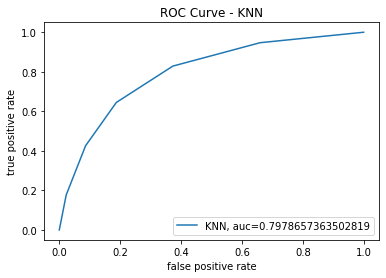

In [41]:
#ROC Curve
y_pred_knn = model_knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn)
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

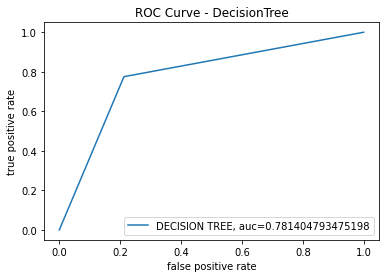

In [42]:
#ROC Curve
y_pred_ID3 = model_dt.predict_proba(X_test)[::,1]
fprdt, tprdt, _ = metrics.roc_curve(y_test,  y_pred_ID3)
aucdt = metrics.roc_auc_score(y_test, y_pred_ID3)
plt.plot(fprdt,tprdt,label="DECISION TREE, auc="+str(aucdt))
plt.title('ROC Curve - DecisionTree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

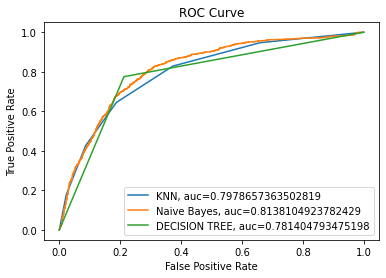

In [43]:
#Comparison between ROC Curve
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.plot(fprnb,tprnb,label="Naive Bayes, auc="+str(aucnb))
plt.plot(fprdt,tprdt,label="DECISION TREE, auc="+str(aucdt))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# **Conclusions**

from the clasification that i've done, I can colclude that the optimal classiefier for this problem are decision tree. Decision tree has a higest accuracy and also has the result class that almost the same with the real predictions. Decision Tree also a good classifier for the hierarchy problem where the value of the feature are connecting one to another like the dataset that we have.